In [1]:
from pathlib import Path
from matplotlib import pyplot as plt
import numpy as np
import scipy.io as spio
import random
import pandas as pd
import seaborn as sns
import numpy as np
import colorsys
import random
import csv

SMALL_SIZE = 14
MEDIUM_SIZE = 16
BIGGER_SIZE = 20

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=SMALL_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title


# Get N distinguisable colors
def _get_colors(num_colors):
    colors=[]
    for i in np.arange(0., 360., 360. / num_colors):
        hue = i/360.
        lightness = (50 + np.random.rand() * 10)/100.
        saturation = (90 + np.random.rand() * 10)/100.
        colors.append(colorsys.hls_to_rgb(hue, lightness, saturation))
    return colors

In [2]:
mainpath = Path('/Users/saadjansari/Documents/Projects/ImageAnalysis/SingleCell/Results/Paper/fig5/monopolar')
mainpath.resolve()
strain_names = ['WT','klp6D', 'alp14D', 'cls1-36']
foldnames = ['wt', 'klp6d', 'alp14d', 'cls1']

df = pd.DataFrame()
df['name'] = strain_names
df['path'] = [ mainpath / relpath for relpath in foldnames]

num_strains = df.shape[0]
cols = _get_colors(num_strains)

In [3]:
# Load n feat per frame csv files
# Add all values to a single list
feats_per_frame_all = []
for idx in np.arange(num_strains):
    
    # Find all dydata.mat files
    path_csv = list( df.path[idx].glob('*/nfeats_per_frame.csv') )
    
    feats_per_frame = np.zeros((0,))
    for pth in path_csv:
        a = np.genfromtxt(pth, dtype=int, delimiter=',')
        feats_per_frame = np.concatenate( (feats_per_frame, a) );
    
    feats_per_frame_all.append( feats_per_frame.tolist() )
df['nfeats_per_frame'] = feats_per_frame_all

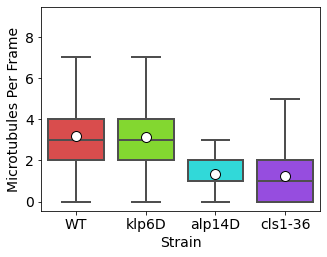

In [26]:
mts_p_frame = []
strain = []
dff = pd.DataFrame()
for idx in range(num_strains):
    nft = df.nfeats_per_frame[idx]
    for val in nft:
        mts_p_frame.append(val)
        strain.append(strain_names[idx])
dff['Microtubules Per Frame'] = mts_p_frame
dff['Strain'] = strain

#colors
my_pal = {"WT": cols[0], "klp6D": cols[1], "alp14D":cols[2], "cls1-36":cols[3]}

# Box plot
meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"10"}
fig,ax = plt.subplots(figsize=(5,3.75))
ax = sns.boxplot(x=dff['Strain'], y=dff['Microtubules Per Frame'], linewidth=2, saturation=0.7, 
                 fliersize=0, showmeans=True, meanprops=meanprops, palette=my_pal)
# ax.set(
#     xlabel='Strain', 
#     ylabel='Microtubules per Frame',
#     ylim=[-0.5,10])

# plt.xticks(plt.xticks()[0], strain_names)
plt.tight_layout()
plt.savefig('/Users/saadjansari/Desktop/monopolar_numMT_strain.pdf')

In [15]:
cols

[(0.97081362416015, 0.18274936167444744, 0.18274936167444744),
 (0.5150038249724239, 0.9825694750595506, 0.04743817488529678),
 (0.05284859420009258, 0.9898712655750596, 0.9898712655750598),
 (0.5898646319559155, 0.18061308630522832, 0.9991161776066034)]